In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data= pd.read_csv('C:/mydata/traffic_accidents.csv')
df=pd.DataFrame(data)

In [5]:
#Verinin Özelliklerini İnceleme 

In [6]:
data.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [7]:
data.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [8]:
data.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [9]:
data.dtypes

crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

In [10]:
#Veri Keşfi ve Analizi

In [11]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

# Kategorik verileri sayısala dönüştürme (Label Encoding)
label_cols = ['weather_condition', 'lighting_condition', 'traffic_control_device', 
              'first_crash_type', 'trafficway_type', 'alignment', 
              'roadway_surface_cond', 'road_defect', 'crash_type', 
              'intersection_related_i', 'damage', 'prim_contributory_cause', 
              'most_severe_injury']

label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [13]:
df.dtypes

crash_date                        object
traffic_control_device             int32
weather_condition                  int32
lighting_condition                 int32
first_crash_type                   int32
trafficway_type                    int32
alignment                          int32
roadway_surface_cond               int32
road_defect                        int32
crash_type                         int32
intersection_related_i             int32
damage                             int32
prim_contributory_cause            int32
num_units                          int64
most_severe_injury                 int32
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

In [14]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [15]:
df.info

<bound method DataFrame.info of                     crash_date  traffic_control_device  weather_condition  \
0       07/29/2023 01:00:00 PM                      16                  2   
1       08/13/2023 12:11:00 AM                      16                  2   
2       12/09/2021 10:30:00 AM                      16                  2   
3       08/09/2023 07:55:00 PM                      16                  2   
4       08/19/2023 02:55:00 PM                      16                  2   
...                        ...                     ...                ...   
209301  09/13/2023 01:08:00 PM                      17                 11   
209302  07/18/2023 02:10:00 PM                      17                  2   
209303  10/23/2019 01:32:00 PM                      16                  2   
209304  06/01/2020 03:23:00 PM                       4                  2   
209305  12/16/2022 12:10:00 PM                      16                  2   

        lighting_condition  first_crash_typ

In [16]:
df.corr

<bound method DataFrame.corr of                     crash_date  traffic_control_device  weather_condition  \
0       07/29/2023 01:00:00 PM                      16                  2   
1       08/13/2023 12:11:00 AM                      16                  2   
2       12/09/2021 10:30:00 AM                      16                  2   
3       08/09/2023 07:55:00 PM                      16                  2   
4       08/19/2023 02:55:00 PM                      16                  2   
...                        ...                     ...                ...   
209301  09/13/2023 01:08:00 PM                      17                 11   
209302  07/18/2023 02:10:00 PM                      17                  2   
209303  10/23/2019 01:32:00 PM                      16                  2   
209304  06/01/2020 03:23:00 PM                       4                  2   
209305  12/16/2022 12:10:00 PM                      16                  2   

        lighting_condition  first_crash_typ

In [17]:
#Kaza saatini kategorize etme 
def categorize_hour(crash_hour):
    if 0<= crash_hour <6:
        return 0 #Gece
    elif 6<= crash_hour <12 :
        return 1 #sabah 
    elif 12<= crash_hour <18:
        return 2 #öğlen 
    else:
        return 3 #akşam 


df["crash_time_category"] = df["crash_hour"].apply(categorize_hour)

In [18]:
#Mevsimsel değişken ekleme 
def categorize_season(crash_month):
    if crash_month in [12, 1, 2]:
        return 0 #Kış 
    elif crash_month in [3,4,5]:
        return 1 #ilkbahar 
    elif crash_month in [6,7,8]:
        return 2 #yaz 
    else:
        return 3 #sonbahar 
df["season"] = df["crash_month"].apply(categorize_season)


In [19]:
#Haftaiçi haftasonu ayrımı 
df["is_weekend"] = df["crash_day_of_week"].apply(lambda x: 1 if x >= 6 else 0)

In [20]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_time_category,season,is_weekend
0,07/29/2023 01:00:00 PM,16,2,3,17,8,3,5,5,1,...,0.0,0.0,0.0,3.0,13,7,7,2,2,1
1,08/13/2023 12:11:00 AM,16,2,1,17,6,3,0,1,1,...,0.0,0.0,0.0,2.0,0,1,8,0,2,0
2,12/09/2021 10:30:00 AM,16,2,3,10,15,3,0,1,1,...,0.0,0.0,0.0,3.0,10,5,12,1,0,0
3,08/09/2023 07:55:00 PM,16,2,3,0,6,3,0,1,0,...,0.0,5.0,0.0,0.0,19,4,8,3,2,0
4,08/19/2023 02:55:00 PM,16,2,3,10,15,3,5,5,1,...,0.0,0.0,0.0,3.0,14,7,8,2,2,1


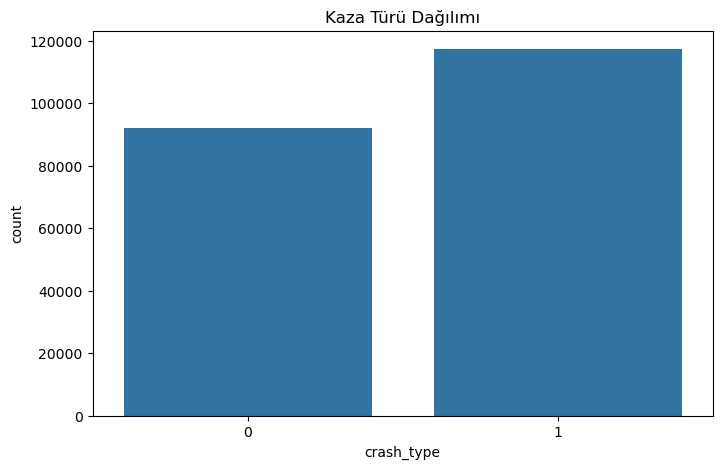

In [21]:
#Kaza Türü Dağılımı(Yaralanmalı /Yaralanmasız)
plt.figure(figsize=(8,5))
sns.countplot(x=df["crash_type"])
plt.title("Kaza Türü Dağılımı")
plt.show()

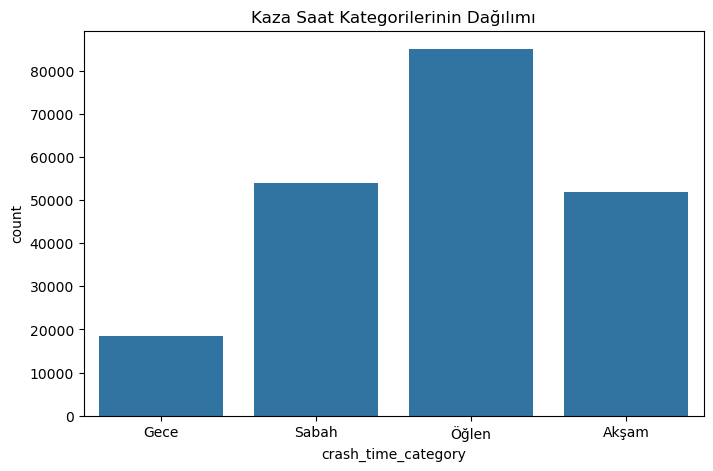

In [22]:
#Mevsimlerin Kaza Ciddiyetine Etkisi 
plt.figure(figsize=(8,5))
sns.countplot(x=df["crash_time_category"])
plt.title("Kaza Saat Kategorilerinin Dağılımı")
plt.xticks(ticks=[0,1,2,3], labels=["Gece", "Sabah", "Öğlen","Akşam"])
plt.show()

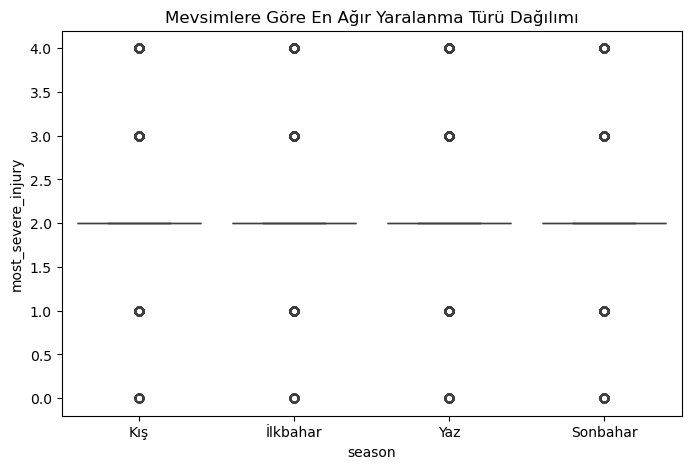

In [23]:
#Kazaların mevsimlerle ilişkisi
plt.figure(figsize=(8,5))
sns.boxplot(x=df["season"], y=df["most_severe_injury"])
plt.title("Mevsimlere Göre En Ağır Yaralanma Türü Dağılımı")
plt.xticks(ticks=[0,1,2,3], labels = ["Kış","İlkbahar","Yaz", "Sonbahar"])
plt.show()

In [60]:
df.dtypes

traffic_control_device             int32
weather_condition                  int32
lighting_condition                 int32
first_crash_type                   int32
trafficway_type                    int32
alignment                          int32
roadway_surface_cond               int32
road_defect                        int32
crash_type                         int32
intersection_related_i             int32
damage                             int32
prim_contributory_cause            int32
num_units                          int64
most_severe_injury                 int32
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
crash_time_category                int64
season          

In [61]:
#Hedef değişkeni belirleme 
X= df.drop(columns=["crash_type"]) #Hedef değişkeni çıkarıyoruz 
y= df["crash_type"] #Hedef değişken 

In [62]:
df.dtypes

traffic_control_device             int32
weather_condition                  int32
lighting_condition                 int32
first_crash_type                   int32
trafficway_type                    int32
alignment                          int32
roadway_surface_cond               int32
road_defect                        int32
crash_type                         int32
intersection_related_i             int32
damage                             int32
prim_contributory_cause            int32
num_units                          int64
most_severe_injury                 int32
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
crash_time_category                int64
season          

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modeli oluştur
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Başarıyı değerlendirme
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8373704075295016
Confusion Matrix:
[[13934  4578]
 [ 2230 21120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     18512
           1       0.82      0.90      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.83      0.83     41862
weighted avg       0.84      0.84      0.84     41862



In [65]:
# Hedef değişkenin (sınıf) dağılımını kontrol et
print(df['crash_type'].value_counts())


crash_type
1    117376
0     91930
Name: count, dtype: int64


In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [67]:
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[13917  4595]
 [ 2243 21107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     18512
           1       0.82      0.90      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.83      0.83     41862
weighted avg       0.84      0.84      0.84     41862



In [72]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Random Forest parametreleri
param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Ağaç sayısı
    'max_depth': [None, 10, 20, 30],          # Ağaç derinliği
    'min_samples_split': [2, 5, 10],          # Minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],            # Minimum yaprak sayısı
    'bootstrap': [True, False]                # Bootstrap kullanımı
}

# RandomizedSearchCV ile hiperparametre arama
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Kaç kombinasyon denenecek
                                   cv=3,       # Cross-validation katman sayısı
                                   verbose=2,   # Sonuçları yazdır
                                   n_jobs=-1,   # Tüm çekirdekleri kullan
                                   random_state=42)

# Modeli eğit
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, verbose=2)

In [73]:

# En iyi parametreler
print("En iyi parametreler:", random_search.best_params_)


En iyi parametreler: {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


In [74]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[13458  5054]
 [ 1391 21959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     18512
           1       0.81      0.94      0.87     23350

    accuracy                           0.85     41862
   macro avg       0.86      0.83      0.84     41862
weighted avg       0.85      0.85      0.84     41862



model = RandomForestClassifier(class_weight="balanced", random_state=42)


In [75]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)


In [76]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Sınıf 1 için olasılıklar
y_pred_new = (y_probs > 0.6).astype(int)  # Varsayılan 0.5 yerine 0.6 eşik değeri
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82     18512
           1       0.85      0.86      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.84      0.84     41862
weighted avg       0.84      0.84      0.84     41862



In [77]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.89      0.74      0.81     18512
           1       0.82      0.93      0.87     23350

    accuracy                           0.85     41862
   macro avg       0.86      0.84      0.84     41862
weighted avg       0.85      0.85      0.84     41862



In [78]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}

random_search = RandomizedSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                                   param_distributions=param_dist,
                                   n_iter=10, 
                                   cv=3, 
                                   verbose=2, 
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
En iyi parametreler: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

Confusion Matrix:
[[13445  5067]
 [ 1334 22016]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     18512
           1       0.81      0.94      0.87     23350

    accuracy                           0.85     41862
   macro avg       0.86      0.83      0.84     41862
weighted avg       0.86      0.85      0.84     41862



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [82]:


# Farklı modelleri tanımla
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=350, max_depth=20, min_samples_split=5, min_samples_leaf=4, bootstrap=True, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Sonuçları saklayacağımız dictionary
results = {}

# Her modeli eğit ve test et
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]
    
    results[name] = {"Accuracy": acc, "F1-score": f1}
    
    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk (Accuracy): {acc:.4f}")
    print(f"F1-score: {f1:.4f}")

# Sonuçları yazdır
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nKarşılaştırma Tablosu:")
print(results_df)



Random Forest modeli eğitiliyor...

Random Forest Sonuçları:
Doğruluk (Accuracy): 0.8374
F1-score: 0.8357

Logistic Regression modeli eğitiliyor...

Logistic Regression Sonuçları:
Doğruluk (Accuracy): 0.8316
F1-score: 0.8263

XGBoost modeli eğitiliyor...

XGBoost Sonuçları:
Doğruluk (Accuracy): 0.8262
F1-score: 0.8253

Neural Network (MLP) modeli eğitiliyor...

Neural Network (MLP) Sonuçları:
Doğruluk (Accuracy): 0.8384
F1-score: 0.8364

Karşılaştırma Tablosu:
                      Accuracy  F1-score
Random Forest         0.837418  0.835734
Logistic Regression   0.831590  0.826280
XGBoost               0.826239  0.825296
Neural Network (MLP)  0.838398  0.836445


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hiperparametre aralıklarını belirle
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search ile en iyi parametreleri bul
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("En iyi parametreler:", rf_random.best_params_)

# En iyi modeli al
best_rf = rf_random.best_estimator_

# Yeni tahminler yap
y_pred_rf = best_rf.predict(X_test)

# Performans değerlendirme
print("\nRandom Forest Güncellenmiş Sonuçlar:")
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}

Random Forest Güncellenmiş Sonuçlar:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     18512
           1       0.81      0.94      0.87     23350

    accuracy                           0.84     41862
   macro avg       0.86      0.83      0.84     41862
weighted avg       0.85      0.84      0.84     41862



In [85]:
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Sınıf 1 için olasılıklar
y_pred_new = (y_probs > 0.6).astype(int)  # 0.5 yerine 0.6 eşik değeri
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82     18512
           1       0.85      0.86      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.84      0.84     41862
weighted avg       0.84      0.84      0.84     41862



In [86]:
import numpy as np

thresholds = np.arange(0.4, 0.8, 0.05)  # 0.4'ten 0.75'e kadar 0.05 aralıklarla
for t in thresholds:
    y_pred_new = (y_probs > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred_new))



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     18512
           1       0.79      0.98      0.87     23350

    accuracy                           0.84     41862
   macro avg       0.87      0.82      0.83     41862
weighted avg       0.86      0.84      0.84     41862


Threshold: 0.45
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     18512
           1       0.80      0.96      0.87     23350

    accuracy                           0.85     41862
   macro avg       0.87      0.83      0.84     41862
weighted avg       0.86      0.85      0.84     41862


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     18512
           1       0.81      0.94      0.87     23350

    accuracy                           0.84     41862
   macro avg       0.86      0.83      0.84     41862
weighted avg       0.85  

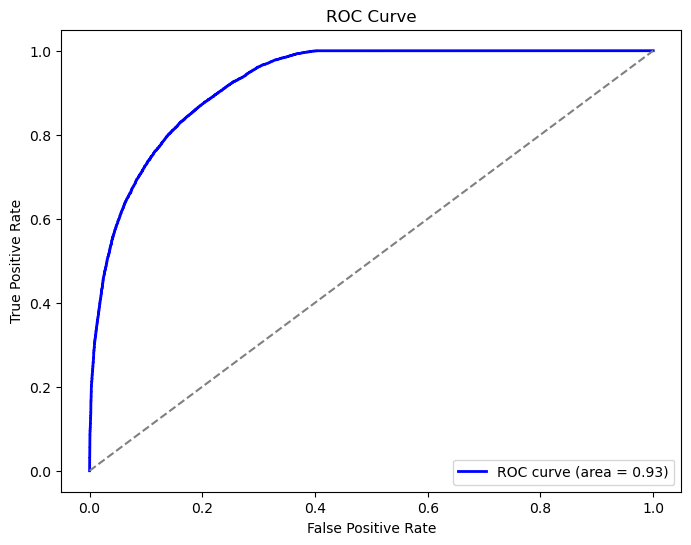

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


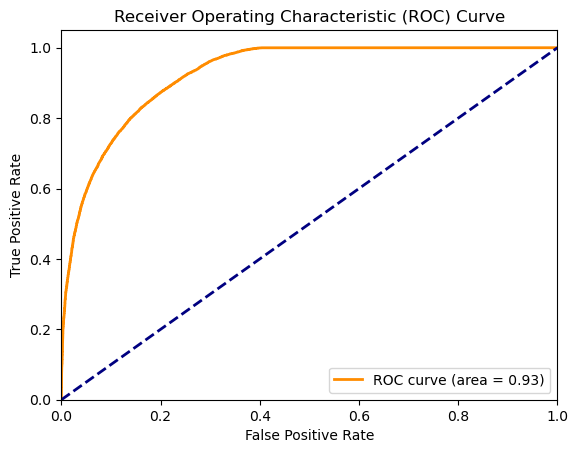

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
